In [1]:
#!pip install gensim
#!pip install nltk

In [2]:
import gensim
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
import nltk
from nltk.corpus import brown

In [4]:
nltk.download('brown')
data = brown.sents()

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


In [5]:
cbow_model = Word2Vec(data, 
                      min_count=1, 
                      vector_size =5, 
                      window =4)

In [7]:
cbow_model.train(data, total_examples=len(data), epochs=10)

(8541884, 11611920)

In [8]:
cbow_model.save('cbol.model')

In [10]:
sims = cbow_model.wv.most_similar('woman', topn=10)
sims

[('informative', 0.9951380491256714),
 ('Plexiglas', 0.9947381615638733),
 ('prudence', 0.9937335848808289),
 ('magician', 0.9931256771087646),
 ('odds-on', 0.9927189350128174),
 ('cheap-money', 0.9922925233840942),
 ('Strikes', 0.9919657111167908),
 ('girl', 0.9917613863945007),
 ('two-to-three', 0.9906286001205444),
 ('cruises', 0.9903656244277954)]

In [14]:
word_vectors = cbow_model.wv
similarity = word_vectors.similarity('woman', 'man')
print(f'Similarity = {similarity}')

Similarity = 0.9701085090637207


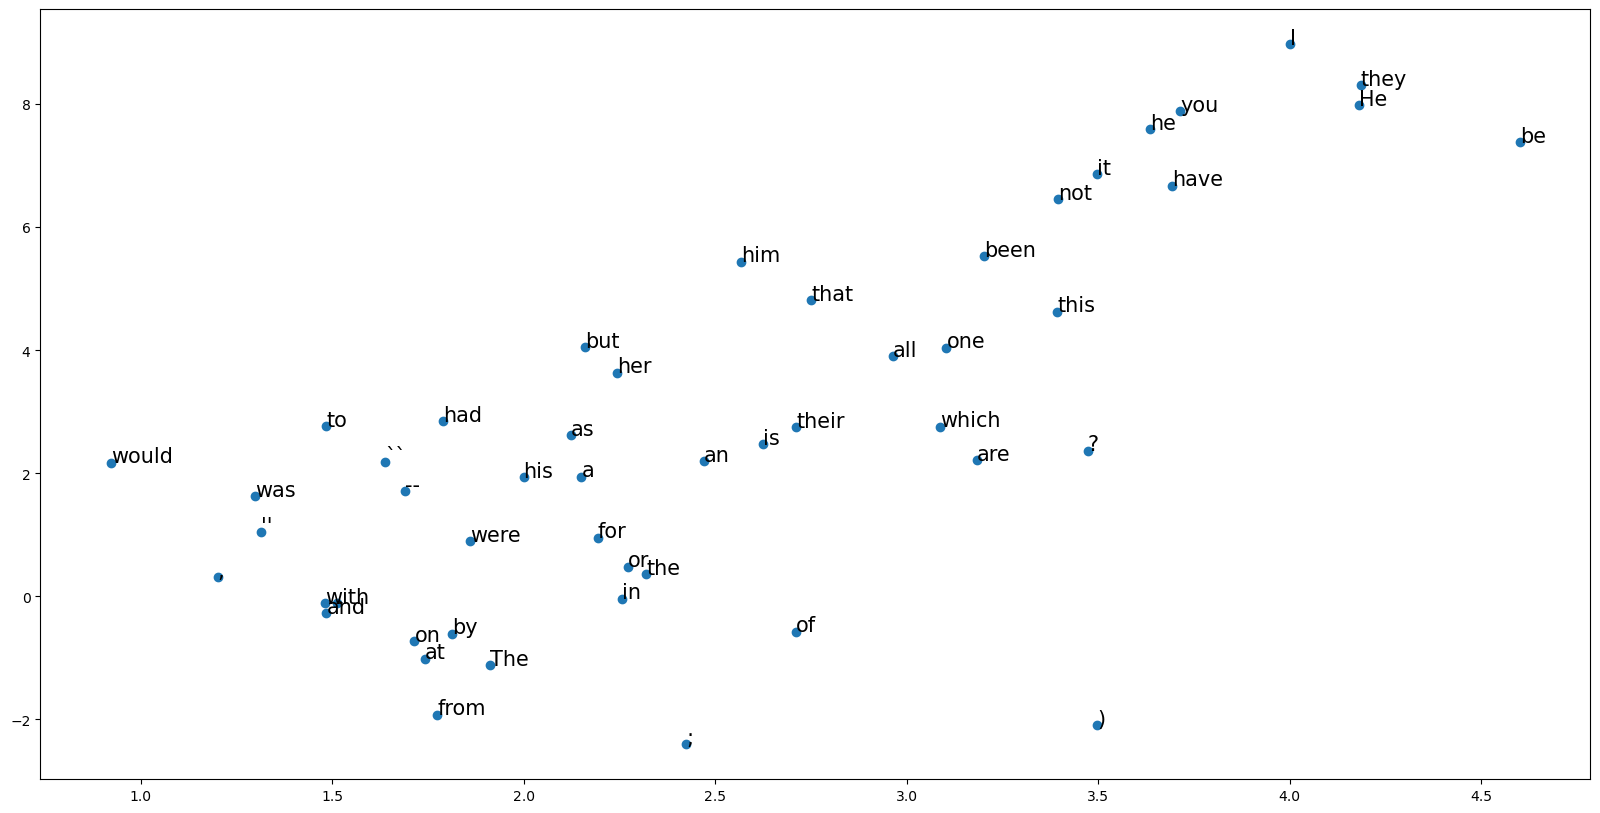

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = [cbow_model.wv[key] for key in cbow_model.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

fig = plt.figure(figsize=(20,10))

plt.scatter(result[:50, 0], result[:50, 1])
words = list(cbow_model.wv.index_to_key)[:50]

for i , word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=15)
plt.show()